In [18]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")
env.unwrapped.configure({
    "action": {"type": "ContinuousAction"},  # Ensure continuous action
})
# Wrap the environment
env.reset()

(array([[ 1.        ,  0.88959044,  0.75      ,  0.3125    ,  0.        ],
        [ 1.        ,  0.09636495, -0.25      , -0.03719879,  0.        ],
        [ 1.        ,  0.19100268, -0.5       , -0.04768553,  0.        ],
        [ 1.        ,  0.29772532, -0.75      , -0.02222143,  0.        ],
        [ 1.        ,  0.39201084, -0.75      , -0.03868895,  0.        ]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': array([-0.07446197,  0.9773437 ], dtype=float32),
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 1.0,
   'high_speed_reward': 0.8333333333333334,
   'on_road_reward': 1.0,
   'reverse_reward': 0.0,
   'stopping_penalty': 0}})

In [20]:
# Create action noise for exploration
n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# Create the DDPG model
model = DDPG(
    "MlpPolicy",
    env,
    action_noise=action_noise,
    learning_rate=0.0003,
    gamma=0.99,
    buffer_size=1000000,
    tau=0.005,
    batch_size=64,
    verbose=1,
    tensorboard_log="ddpg_highway_tensorboard"
)

# Train the model
model.learn(total_timesteps=10000, tb_log_name="ddpg1")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ddpg_highway_tensorboard\ddpg1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.25     |
|    ep_rew_mean     | 0.262    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4        |
|    time_elapsed    | 1        |
|    total_timesteps | 5        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.38     |
|    ep_rew_mean     | 0.258    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 4        |
|    time_elapsed    | 2        |
|    total_timesteps | 11       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.5      |
|    ep_rew_mean     | 0.172    |
| time/              |          |
|    episode

In [29]:
model.learn(total_timesteps=5000, tb_log_name="ddpg1",reset_num_timesteps=False)

Logging to ddpg_highway_tensorboard\ddpg1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.8     |
|    ep_rew_mean     | 25.1     |
| time/              |          |
|    episodes        | 672      |
|    fps             | 3        |
|    time_elapsed    | 0        |
|    total_timesteps | 10001    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.7     |
|    ep_rew_mean     | 25.1     |
| time/              |          |
|    episodes        | 676      |
|    fps             | 4        |
|    time_elapsed    | 38       |
|    total_timesteps | 10156    |
| train/             |          |
|    actor_loss      | -37.1    |
|    critic_loss     | 5.09     |
|    learning_rate   | 0.0003   |
|    n_updates       | 10055    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.6     |
|   

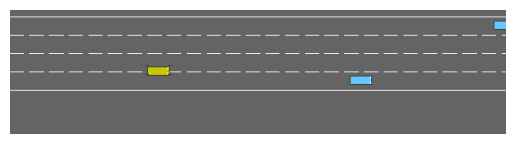

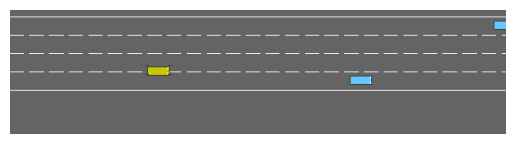

In [27]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# modewl = TD3.load("td3_highway_model")
# # Create the environment
# env = gym.make("highway-v1",render_mode="rgb_array")

# # Configure the environment for continuous actions
# env.unwrapped.configure({
#     "action": {"type": "ContinuousAction"},
#     "duration": 40,  # [s]
#     "lanes_count": 4,
#     "vehicles_count": 50,
#     "controlled_vehicles": 1,
#     "initial_lane_id": None,
#     "ego_spacing": 2,
#     "collision_reward": -1,  
#     "right_lane_reward": 0.4,
#     "high_speed_reward": 0.8,
#     "lane_change_reward": 0,
#     "reward_speed_range": [10, 30],
#     "reverse_reward": -2,
#     "stopping_penalty": -2,
#     "normalize_reward": True,
#     "offroad_terminal": False,
# })

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)


    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [30]:
# Save the trained model
model.save("ddpg_highwayv1")